<a href="https://colab.research.google.com/github/germancruzram/Detector-de-grietas-CH/blob/main/Deteccion_de_grietas_CH_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo IA para detección de grietas en pavimentos rigidos.**
**Creado por : German Cruz R. Mayo 2024. 🇳**

# **1. PREPARANDO LAS LIBRERIAS**

In [ ]:
%%capture
!pip install super-gradients
!pip install imutils
!pip install gdown

# **2. IMPORTANDO EL MODELO ENTRENADO**

In [ ]:
# Enlace directo de Google Drive
url = 'https://drive.google.com/uc?id=1ozj7icywAbU8_qQmhuC-bqEYt_oRV7DD'

# MODELO IA ENTRENADO PARA DETECTAR GRIETAS
# CREADO POR GERMAN CRUZ R. MAYO 2024
output = '/content/crackCH_0524.pth'
!gdown {url} -O {output}

print("Archivo descargado y guardado en", output)

Downloading...
From (original): https://drive.google.com/uc?id=1ozj7icywAbU8_qQmhuC-bqEYt_oRV7DD
From (redirected): https://drive.google.com/uc?id=1ozj7icywAbU8_qQmhuC-bqEYt_oRV7DD&confirm=t&uuid=c4a76011-1ac8-493f-a080-6048869d208d
To: /content/crackCH_0524.pth
 97% 249M/256M [00:02<00:00, 75.4MB/s]

# **3. IMPORTANDO LOS INSTRUMENTOS**



In [ ]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

In [ ]:
from IPython.display import clear_output


In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback



In [ ]:
from super_gradients.training import models

# **3. DEFINICION DE LAS CLASES**

In [ ]:
dataset_params = {
    'classes': ['grieta_lineal']

}

# **4. CARGANDO EL MODELO**

In [ ]:
best_model = models.get('yolo_nas_s',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="/content/crackCH_0524.pth")



[2024-05-15 18:39:21] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/crackCH_0524.pth EMA checkpoint.


# **5. EJECUTANDO LA DETECCIÓN**


In [ ]:
import os
from google.colab import files

# Crear la carpeta "fotografias"
folder_name = '/content/fotografias'
os.makedirs(folder_name, exist_ok=True)
print(f'Carpeta "{folder_name}" creada exitosamente')


[2024-05-15 18:47:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


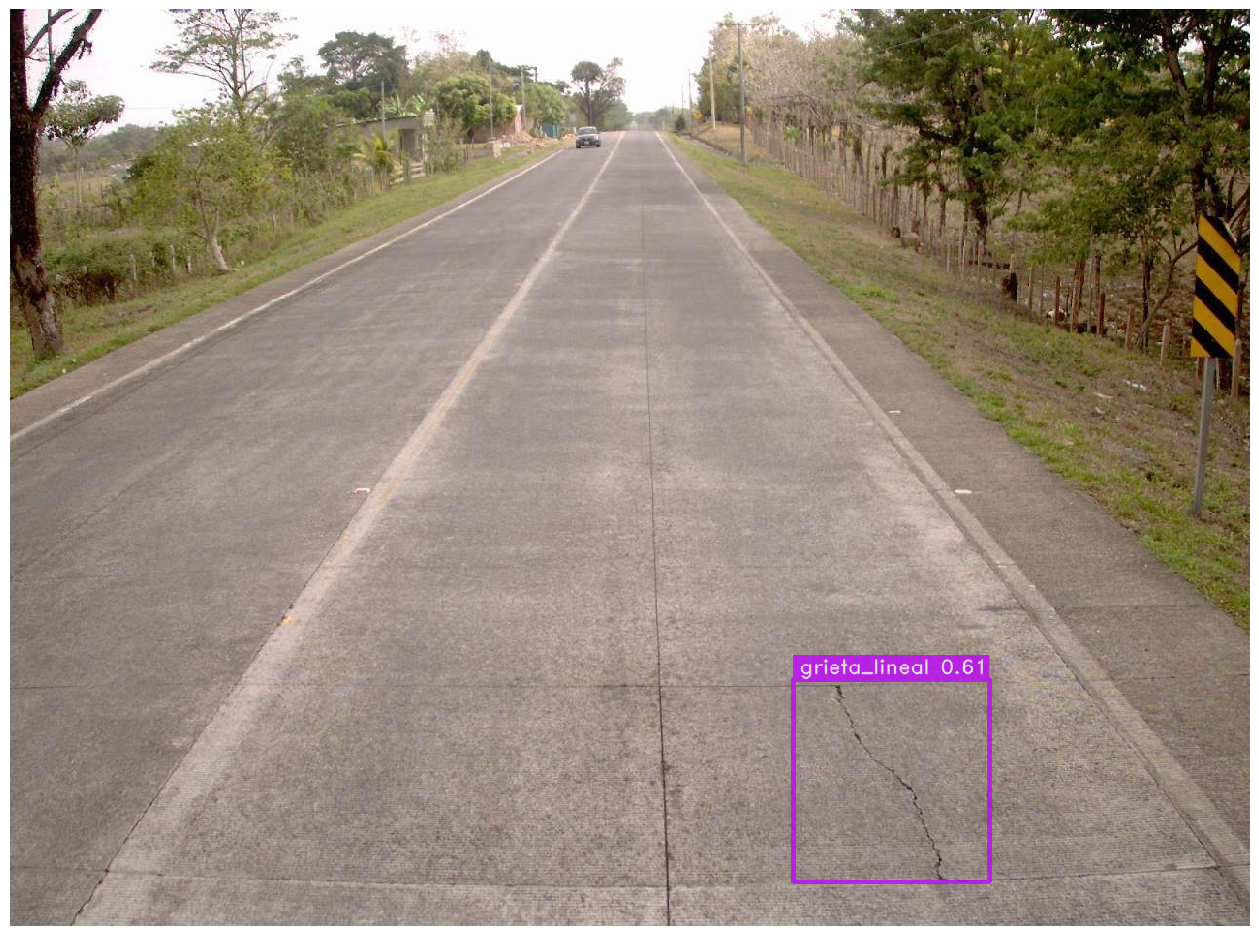

Processed 01-NIC-21B Mulukuku - Siuna Centro 0001286.jpg
Finished processing all images.


In [ ]:
  import os

  folder_path = '/content/fotografias'

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Asegúrate de que sean imágenes
        # Construye la ruta completa hacia la imagen
        img_path = os.path.join(folder_path, filename)

        # Aplica el modelo de detección a la imagen
        detections = best_model.predict(img_path)

        # Muestra las detecciones (Suponiendo que 'show()' es un método para visualizar)
        detections.show()

        # Opcional: Guardar o procesar más los resultados aquí

        print(f"Processed {filename}")
    else:
        continue

print("Finished processing all images.")



[2024-05-15 18:45:30] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/crackCH_0524.pth EMA checkpoint.
[2024-05-15 18:45:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


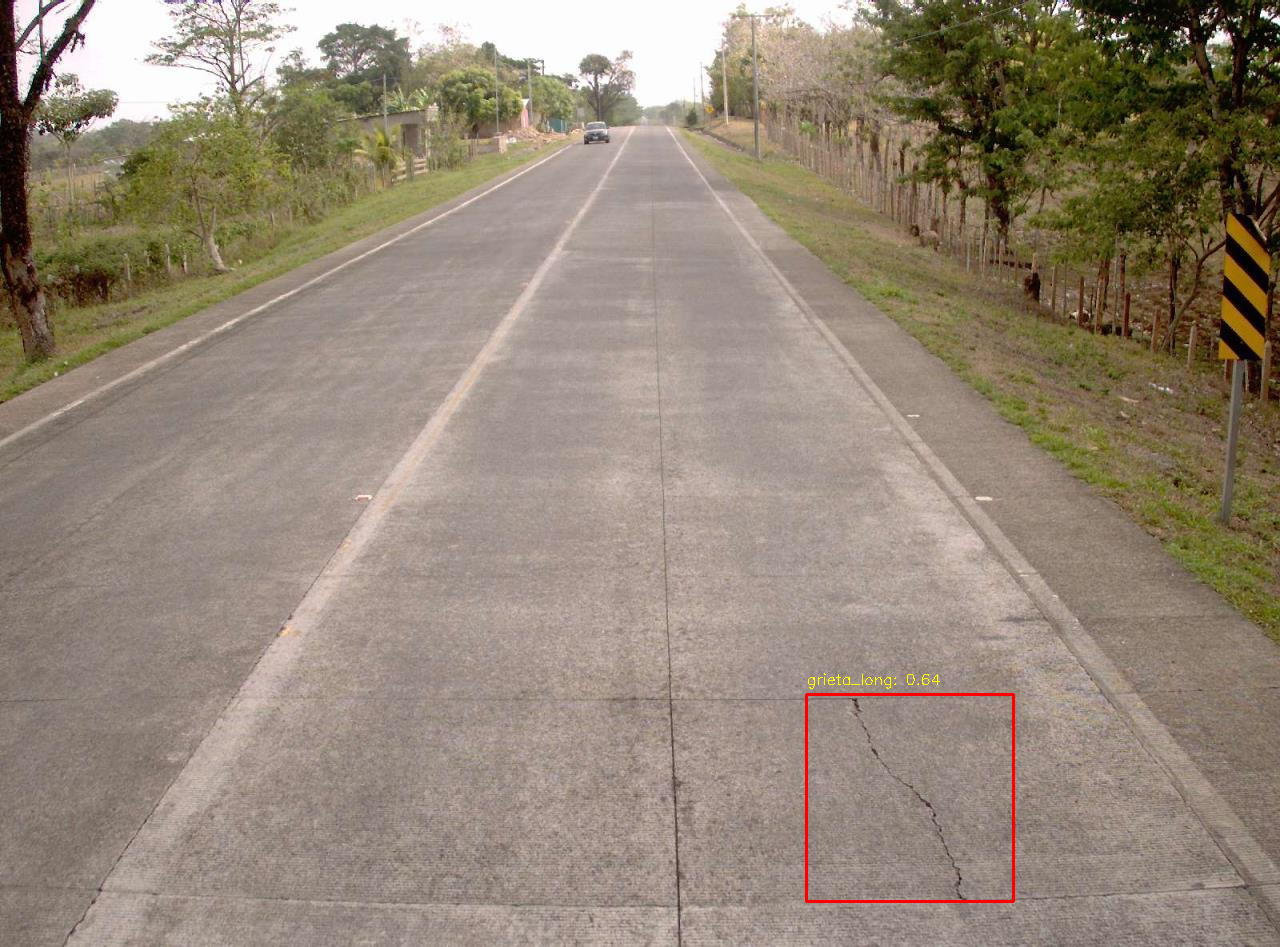

In [ ]:
import cv2
import numpy as np
from super_gradients.training import models




# No ajustar el umbral aquí, ya que el modelo no permite umbrales inferiores a 0.5
# best_model.confidence_threshold = 0.31 # Esta línea se ignora si el modelo no la acepta

# Carga la imagen desde una URL
img_url = '/content/fotografia/01-NIC-21B Mulukuku - Siuna Centro 0001286.jpg'
img = cv2.imread(img_url)

# Realiza la predicción
outputs = best_model.predict(img)

# Extrae las detecciones adecuadamente
detections = []
for bbox, confidence, label in zip(outputs.prediction.bboxes_xyxy, outputs.prediction.confidence, outputs.prediction.labels):
    if confidence > 0.3:
        detections.append({'confidence': confidence, 'bbox': bbox, 'class_id': label})

# Visualiza las detecciones filtradas manualmente
for det in detections:
    x_min, y_min, x_max, y_max = map(int, det['bbox'])
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)  # Rojo en formato BGR
    label = f"{dataset_params['classes'][det['class_id']]}: {det['confidence']:.2f}"
    cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 1)  # Rojo en formato BGR

# Guardar la imagen con las detecciones
cv2.imwrite('/content/detections.jpg', img)

# Mostrar la imagen con las detecciones
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# No es necesario destruir las ventanas en Colab
# cv2.destroyAllWindows()


